In [1]:
#pip install scikit-learn pandas

import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, delimiter=';')

In [3]:
# Define features and target variable
X = data.drop('quality', axis=1)
y = data['quality']

In [4]:
# Binarize the target variable (to simplify the classification task)
y = (y >= 6).astype(int)  # Good quality wine: quality >= 6

In [5]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# ID3 (using entropy)
id3_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3_model.fit(X_train, y_train)
id3_pred = id3_model.predict(X_test)
id3_accuracy = metrics.accuracy_score(y_test, id3_pred)

In [7]:
# C4.5 (approximated using gini)
c45_model = DecisionTreeClassifier(criterion='gini', random_state=42)
c45_model.fit(X_train, y_train)
c45_pred = c45_model.predict(X_test)
c45_accuracy = metrics.accuracy_score(y_test, c45_pred)

In [8]:
print(f"ID3 (Entropy) Accuracy: {id3_accuracy}")
print(f"C4.5 (Gini) Accuracy: {c45_accuracy}")

ID3 (Entropy) Accuracy: 0.7270833333333333
C4.5 (Gini) Accuracy: 0.7666666666666667


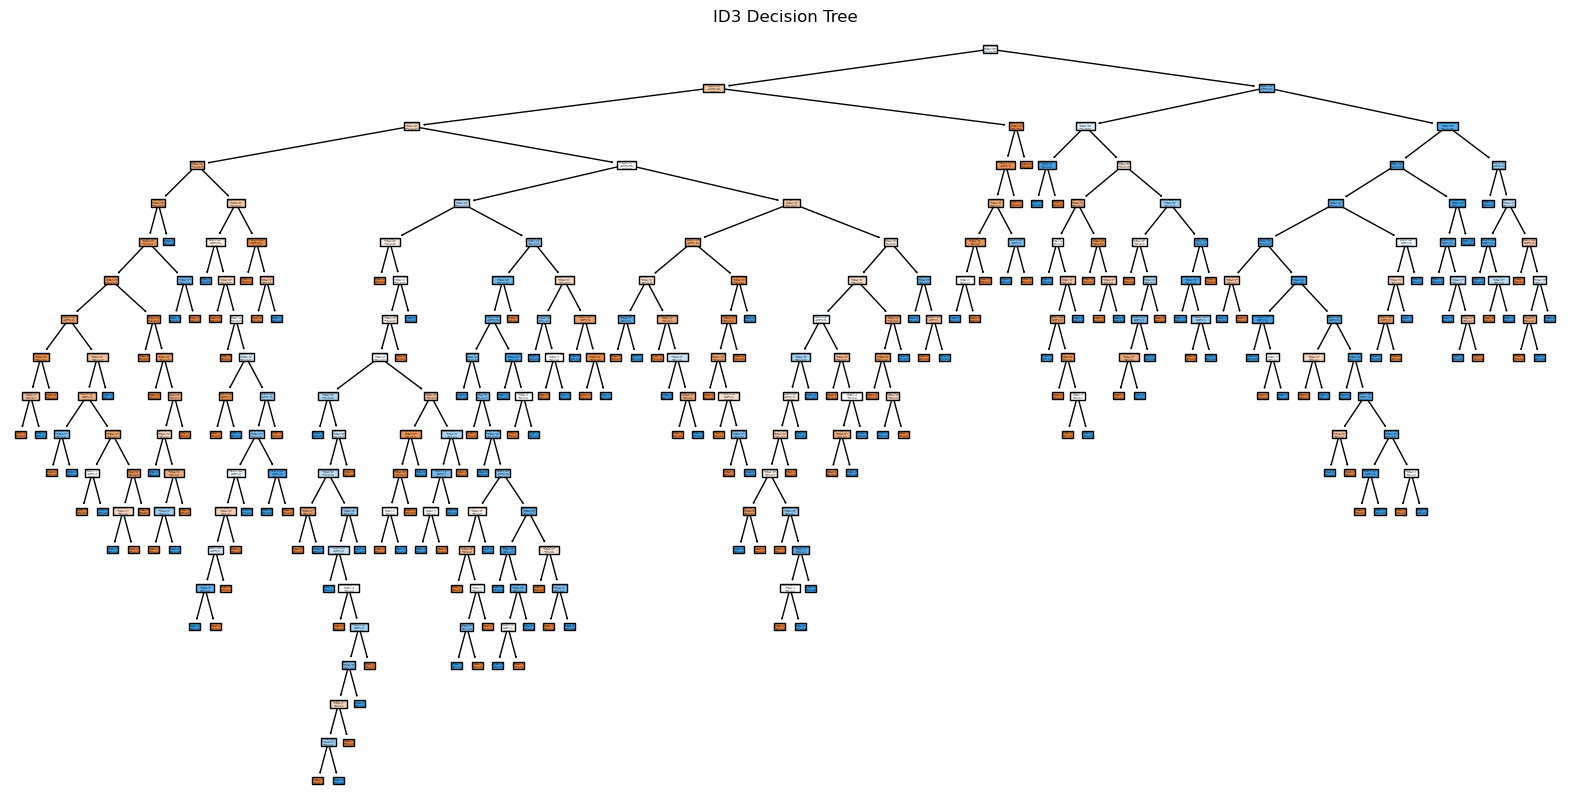

In [9]:
plt.figure(figsize=(20,10))
tree.plot_tree(id3_model, filled=True, feature_names=X.columns, class_names=['Bad', 'Good'])
plt.title("ID3 Decision Tree")
plt.show()

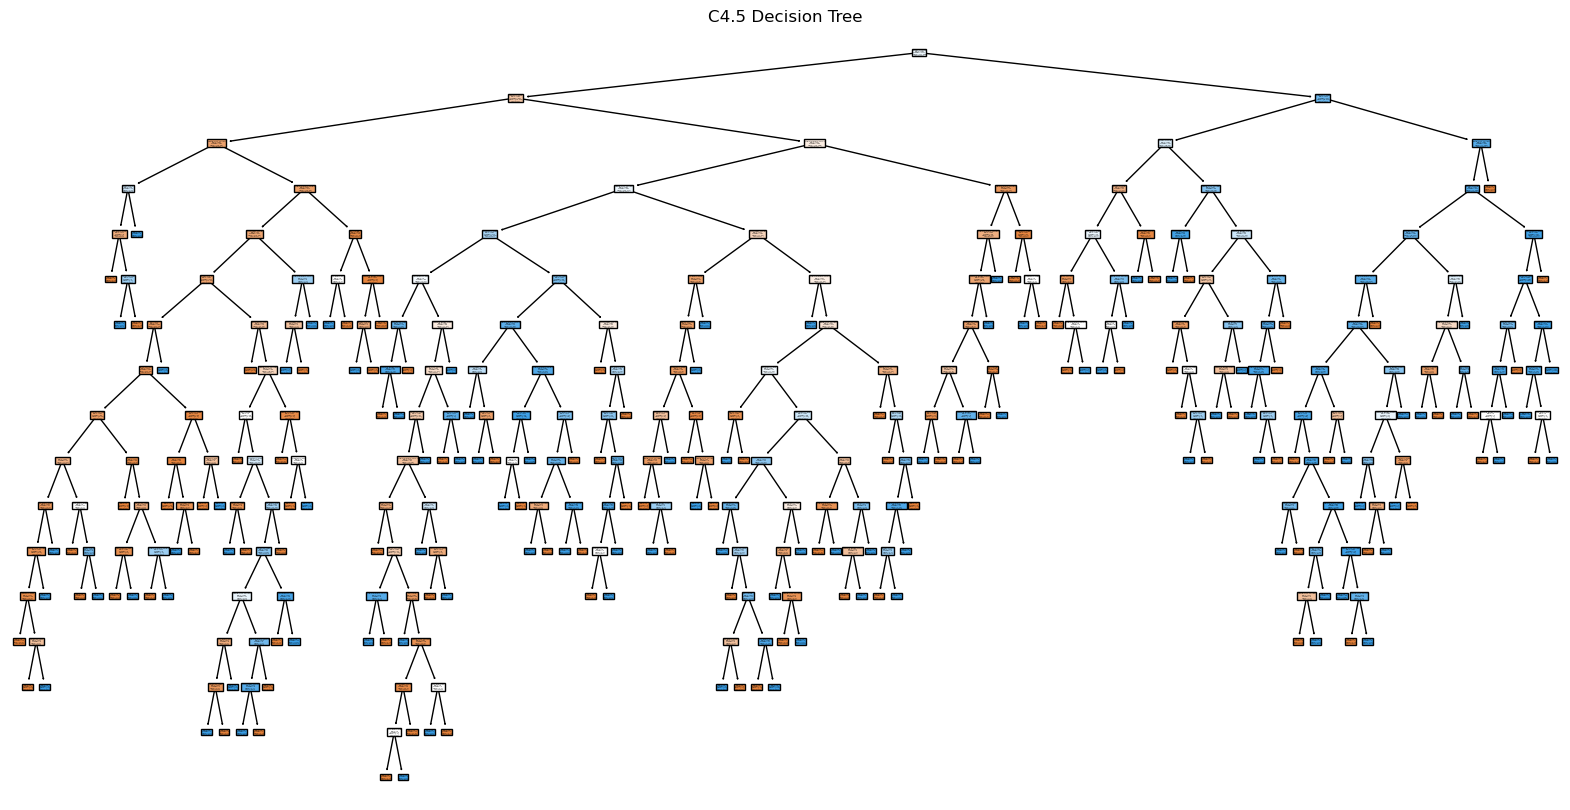

In [10]:
plt.figure(figsize=(20,10))
tree.plot_tree(c45_model, filled=True, feature_names=X.columns, class_names=['Bad', 'Good'])
plt.title("C4.5 Decision Tree")
plt.show()